In [2]:
from funciones_LSTM import *

In [4]:
import holidays

In [15]:
df = pd.read_parquet('data_export/prueba_ml.parquet')
df.reset_index(inplace=True, drop=True)
df['dia_semana'] = df['fecha'].dt.weekday + 1
year = 2023
us_holidays = holidays.US(years=year)
us_holidays
df['holiday'] = np.where(df['fecha'].isin(us_holidays), 1, 0)
df['rain'] = df['rain'].shift(1)
df['snowfall'] = df['snowfall'].shift(1)
df.fillna(0.0, inplace=True)
df.head()

,fecha,hora,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia,dia_semana,holiday
0,2023-11-01,0.0,8.6725,0.0,60.153034,0.0,3,12,2196,232,1,2023,11,1,3,0
1,2023-11-01,1.0,8.5725,0.1,60.344471,0.0,2,12,1521,55,0,2023,11,1,3,0
2,2023-11-01,2.0,8.3225,0.0,62.933163,0.0,3,8,1214,16,0,2023,11,1,3,0
3,2023-11-01,3.0,8.0725,0.1,66.100021,0.0,0,13,854,20,0,2023,11,1,3,0
4,2023-11-01,4.0,7.7725,0.0,72.938622,0.0,12,20,654,25,0,2023,11,1,3,0


Comparemos utilizar distintas features:

In [16]:
columnas_X = ['año', 'mes', 'dia', 'hora', 'dia_semana', 'holiday', 'temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall']
X = df[columnas_X]

columnas_Y= ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Y = df[columnas_Y]



9/9 [==============================] - 0s 1ms/step - loss: 0.0254
Valor final de Loss: 0.02539197728037834


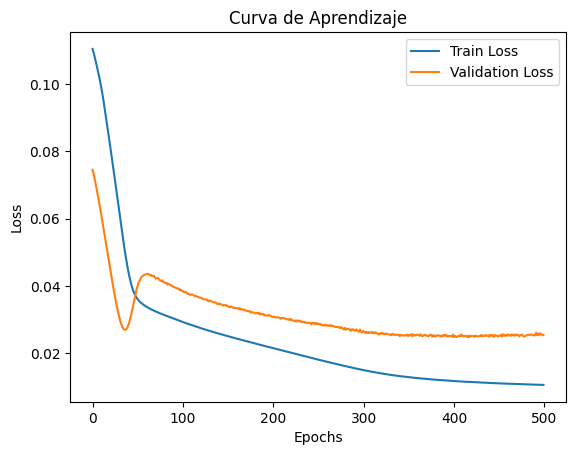

9/9 [==============================] - 0s 2ms/step


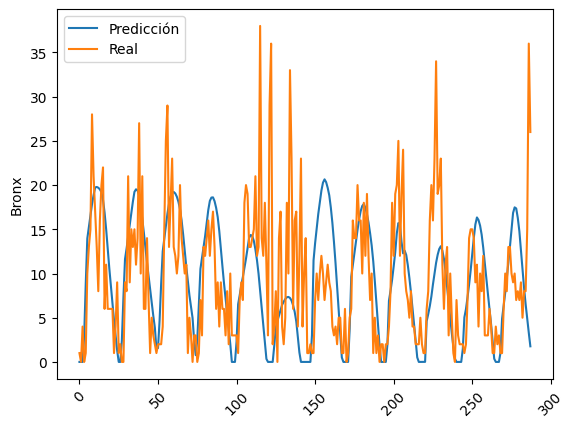

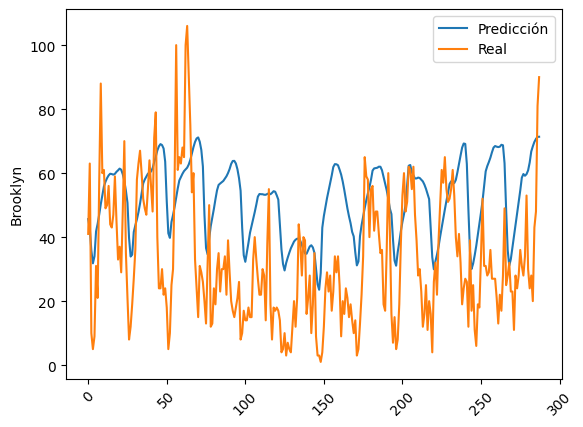

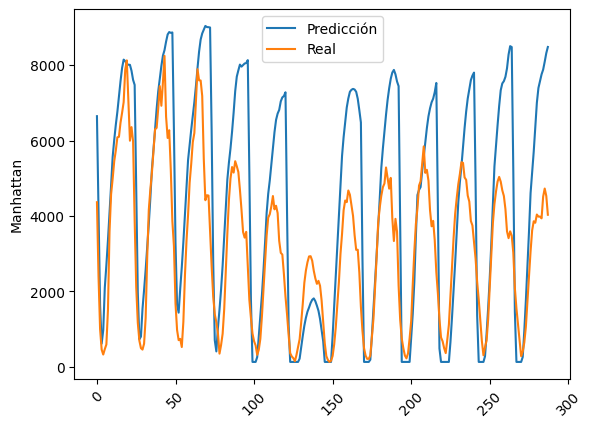

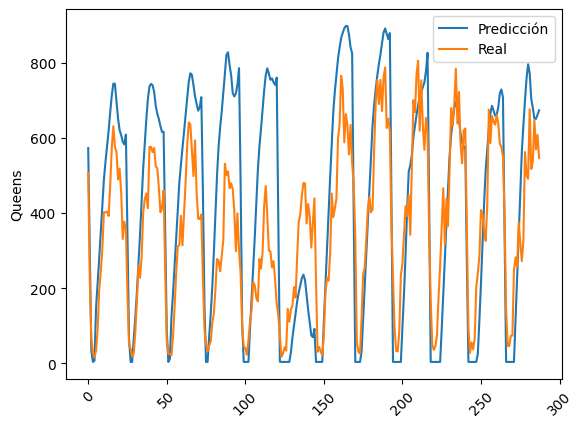

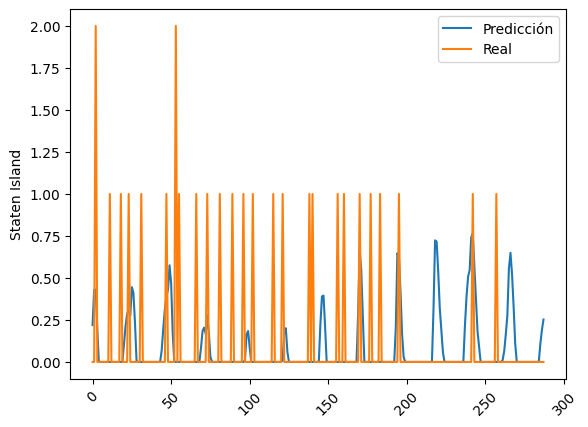

In [7]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid', learning_r=0.00001, 
                     epochs=500 )
graficar_curva_aprendizaje(history)
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Quitemos las variables climáticas:

In [8]:
columnas_X = ['año', 'mes', 'dia', 'hora', 'dia_semana', 'holiday']
X = df[columnas_X]

9/9 [==============================] - 0s 3ms/step - loss: 0.0376
Valor final de Loss: 0.03761425241827965


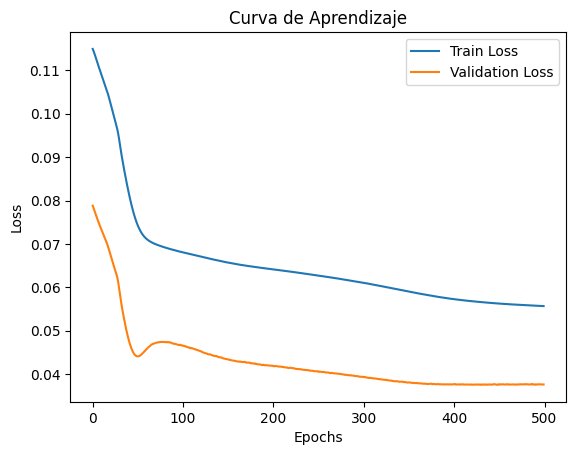

9/9 [==============================] - 0s 3ms/step


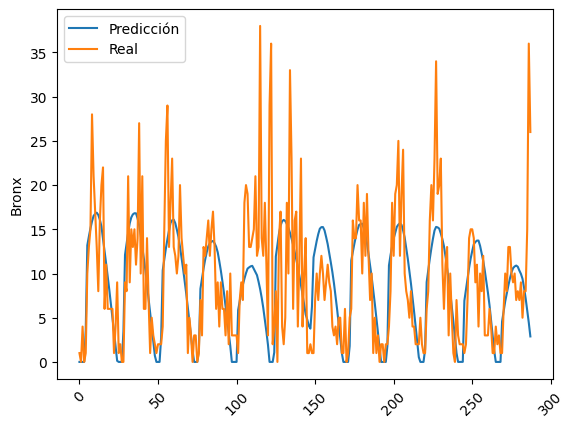

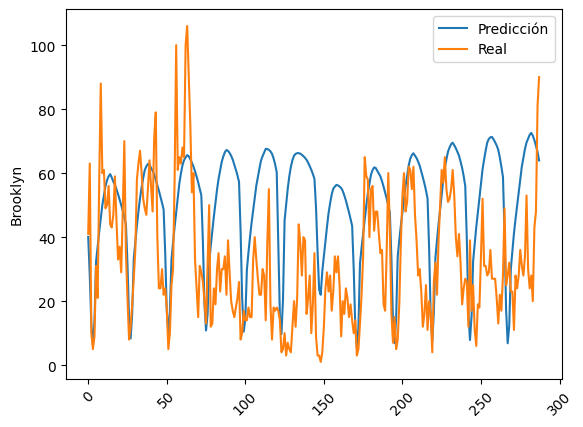

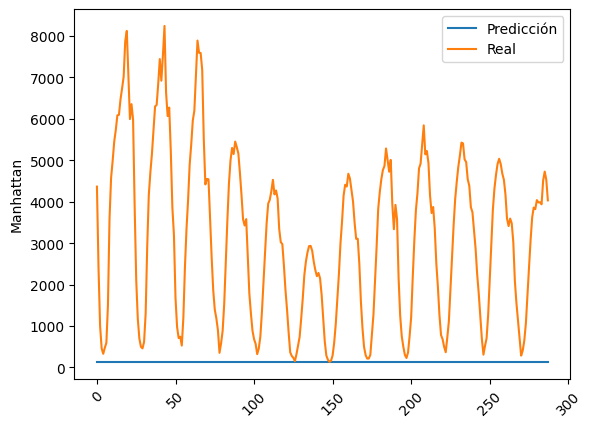

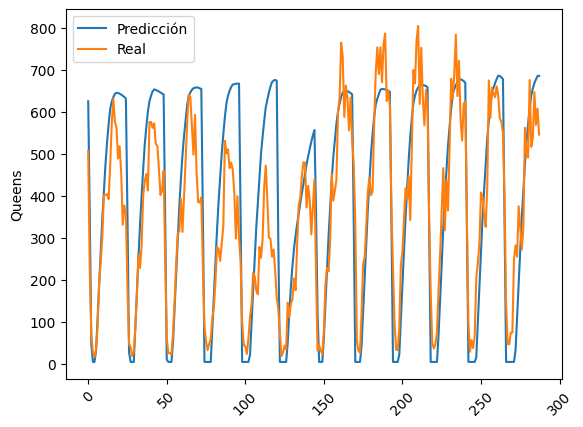

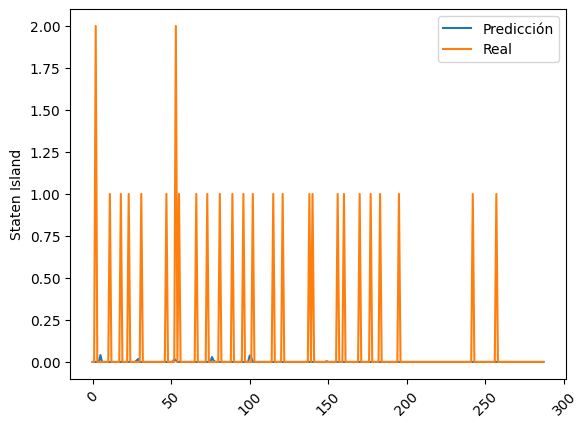

In [9]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid', learning_r=0.00001, 
                     epochs=500 )
graficar_curva_aprendizaje(history)
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Quitemos día de la semana y holiday

In [10]:
columnas_X = ['año', 'mes', 'dia', 'hora']
X = df[columnas_X]

9/9 [==============================] - 0s 2ms/step - loss: 0.0458
Valor final de Loss: 0.04575998708605766


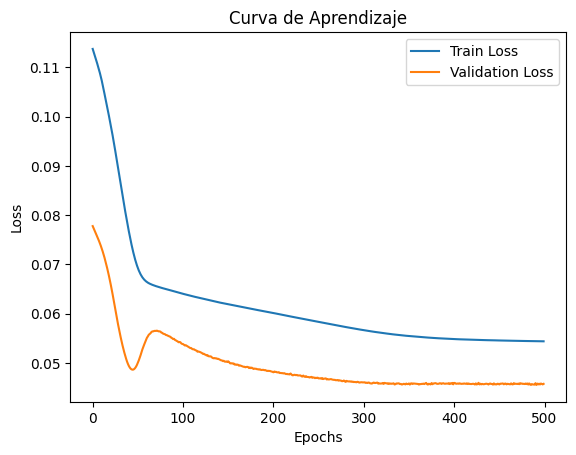

9/9 [==============================] - 0s 4ms/step


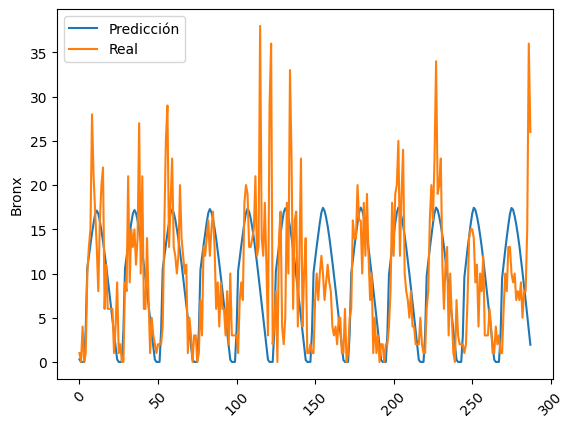

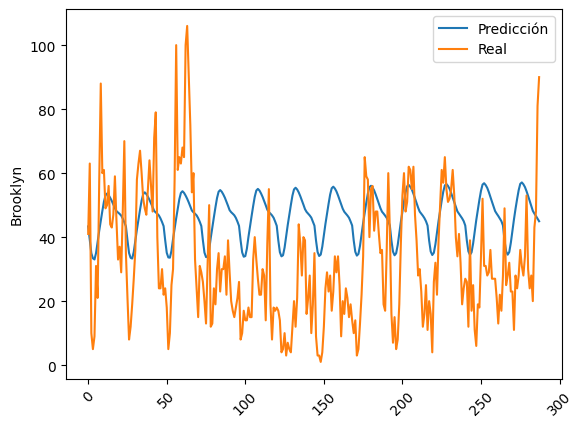

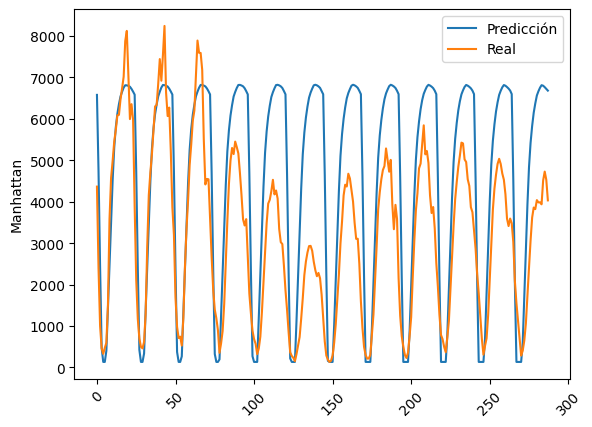

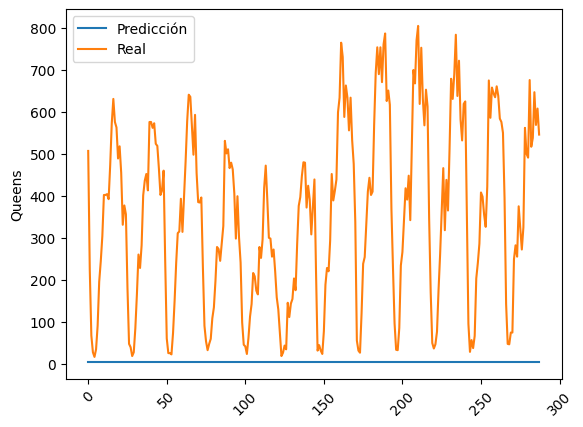

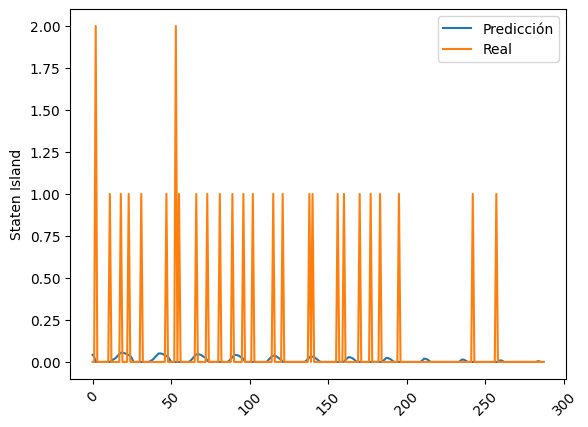

In [11]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid', learning_r=0.00001, 
                     epochs=500 )
graficar_curva_aprendizaje(history)
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Como conclusión, podemos decir que las variables de tipo de día y climáticas son útiles para nuestro modelo

In [12]:
X_test_reshaped.shape

(288, 5, 4)

In [13]:
X_test_reshaped

array([[[0.        , 1.        , 0.6       , 0.82608696],
        [0.        , 1.        , 0.6       , 0.86956522],
        [0.        , 1.        , 0.6       , 0.91304348],
        [0.        , 1.        , 0.6       , 0.95652174],
        [0.        , 1.        , 0.6       , 1.        ]],

       [[0.        , 1.        , 0.6       , 0.86956522],
        [0.        , 1.        , 0.6       , 0.91304348],
        [0.        , 1.        , 0.6       , 0.95652174],
        [0.        , 1.        , 0.6       , 1.        ],
        [0.        , 1.        , 0.63333333, 0.        ]],

       [[0.        , 1.        , 0.6       , 0.91304348],
        [0.        , 1.        , 0.6       , 0.95652174],
        [0.        , 1.        , 0.6       , 1.        ],
        [0.        , 1.        , 0.63333333, 0.        ],
        [0.        , 1.        , 0.63333333, 0.04347826]],

       ...,

       [[0.        , 1.        , 1.        , 0.69565217],
        [0.        , 1.        , 1.        , 0.739130